# Coursera - IBM Data Science Professional Certificate

### Assignment - The Battle of Neighborhoods

## 1. Introduction

Imagine we have a friend who lives in Paris and who plans to travel over to US for a business trip and stop-over in New York for a long weekend and enjoy the city. 

When in Paris, he likes to hang out in Saint Germain, a district where you can find plethora of cafes, brasseries, bars, and restaurants. You also find art galleries, antique stores, theaters and cinemas, street markets, parks, clothing retailers and other shops. Saint Germain in quite central of Paris and located in the 6th arrondissement.

Now, he would like to find the same in New York but doesn't know much about that city. Where is the Saint Germain of New York? What neighborhood of New York is similar to Saint Germain? 

To answer questions like the one asked by our friend, we analyze here data from Foursquare, a popular location-based social network. Foursquare enables users to share their current location with friends, rate and comment on venues they visit (places such as restaurants, hotels, cafeterias, bookshops, and museums) and read reviews of venues that other users have left.

For the purposes of this project, we use geographical datasets of the two cities New York, more specifically Manhattan, and Paris. We take the neighborhoods to be areas on a city's geographic map. We then inquire the venues recommendations from Foursquare through their API. Each area is associated with the set of venues within predefined boundaries, based on our manually collected ground-truth data. In turn, each venue is associated with a name, a category (e.g. restaurant, coffee shop, bar, museum, art gallery, etc.), and a geographic location (latitude and longitude). We got about 1,800 venues listed for Paris and 3,300 venues for Manhattan.

## 2. Data

#### Paris geographical data

Paris is divided into 20 administrative districts, referred to as arrondissements. The 20 arrondissements are arranged in the form of a clockwise spiral (often likened to a snail shell), starting from the center of the city.

Among landmarks of Paris, we can find the **Louvre Museum** in the 1st arrondissement, the **Museum of Modern Art (Georges Pompidou)** in the 3rd arrondissement, **Notre Dame Cathedral** in the 4th arrondissement, the **Eiffel Tower** in the 7th arrondissement, the **Champs-Elysées Avenue** in the 8th arrondissement, the **Arc of Triumph** at the limits of the 8th, 16th, and 17th arrondissements, and so on.

One may find open datasets about Paris at https://opendata.paris.fr/page/home/. Here below are the links to the arrondissements geographical data.

csv file:
https://opendata.paris.fr/explore/dataset/arrondissements/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=true

json file:
https://opendata.paris.fr/explore/dataset/arrondissements/download?format=json&timezone=Europe/Berlin&use_labels_for_header=true


Here is a sample of the raw Paris dataset, once it is converted into a dataframe.

![alt text](paris_dataset_raw.png "Paris geographical raw data")


We use the location, i.e. **latitude** and **longitude** information, as well as the **arrondissement number** and **name**, associated to each arrondissement from the table above.


#### New York geographical data

Geographically, New York is a city with 5 boroughs, which are the Bronx, Brooklyn, Manhattan, Queens, and Staten Island, and hundreds of neighborhoods.

When we think of New York City, Manhattan is often the first place we picture. The borough is home to well-known attractions, such as **Central Park**, the **Empire State Building**, world-class museums such as **MOMA**, the bright lights of **Times Square** and **Broadway**. Manhattan contains big-name neighborhoods, international restaurants, classy boutiques, trendy bars and more.

There’s no shortage of information about New York City. For the sake of simplicity, we use the one provided by IBM in the segmenting and clustering lab of this course.

json file:
https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json


Here is a sample of the raw New York dataset, once it is converted into a dataframe.

![alt text](ny_dataset_raw.png "New York geographical raw data")

We use the features subset/key information, from where we can extract the **borough** name, **neigborhood** name, and **latitude** and **longitude**, associated to each borough.


#### Venues recommendations API by Foursquare

Foursquare features a developer API that lets developpers applications make use of Foursquare's location data. Their API powers various geo-enabled searches of venues with sophisticated details (e.g. tips, hours, menus, stats over time), searches of users, checkins, etc. 

In the scope of the resources allocated to this project, we just use the API feature of exploring top recommended venues nearby a location that returns basic venue data (name, location, etc.), category, and ID.


#### Combining the geographical cities data with Foursquare venues

The approach is to gather venues data from Foursquare based on our two cities neighborhoods. We then use the **venues categories** feature for clustering the neighborhoods and look for basic similarities between these neighborhoods of Paris and Manhattan. 

## 3. Methodology

### 3.1 Datasets Exploration and Setting

In this section, we perform **data wrangling**, as below:

1. Geographical data of Paris arrondissements and New York boroughs/neighborhoods.

   * Extracting neighborhood geographical information for the cities of Paris and New York from json files (refer to the links provided in the Data section above).   
   
   * Creating Pandas dataframes that include:
   
       * names of the boroughs/arrondissements, 
       * names of the neighborhoods, 
       * locations of the neighborhoods in terms of latitude and longitude.       
       
   * Visualizing the neighborhoods in on a Leaflet map via the Folium library.
   

2. Foursquare recommended venues data based on neighborhoods geolocalisation.

    * Gathering venues recommendations through the explore endpoint API.    
    
    * Creating Pandas dataframes that include:
    
       * names of the boroughs/arrondissements, 
       * names of the neighborhoods, 
       * locations of the neighborhoods in terms of latitude and longitude,
       * the names of the venues,
       * locations of the venues in terms of latitude and longitude,
       * categories of the venues.
       


#### 3.11 Geographical data of Paris and New York


##### Let's download all the packages that we need for this project.

In [1]:
# import libraries

import urllib.request # open and read URLs

import json # handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests # handle requests
import pandas as pd # process data as dataframes with Pandas
import numpy as np # handle data in a vectorized manner with NumPy

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed the GeoPy geocoding library yet
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed the Folium library yet
import folium # map rendering library

# Matplolib plotting library and associated modules
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # for K-Means clustering with Scikit-Learn

print("Libraries imported!")

Libraries imported!


##### Exploring json file dataset and creating Pandas dataframe of Paris

In [2]:
# Get data about Paris geography from https://opendata.paris.fr website

with urllib.request.urlopen("https://opendata.paris.fr/explore/dataset/arrondissements/download?format=json&timezone=Europe/Berlin&use_labels_for_header=true") as url:
   data = json.loads(url.read())
data

[{'datasetid': 'arrondissements',
  'recordid': 'fdcdd162efd8d445fdecb7b95ed7df1ff4c59f26',
  'fields': {'n_sq_co': 750001537,
   'perimetre': 4554.10435957,
   'objectid': 2,
   'l_ar': '2ème Ardt',
   'geom_x_y': [48.86827922252252, 2.3428025468913636],
   'surface': 991153.74474596,
   'longueur': 4553.93876373,
   'geom': {'type': 'Polygon',
    'coordinates': [[[2.351518483670821, 48.8644258050741],
      [2.350949105218923, 48.86340592861751],
      [2.346676032763327, 48.864430925901665],
      [2.346675453051013, 48.86443106483368],
      [2.345101655171463, 48.864809197959836],
      [2.341271025930368, 48.86572767724484],
      [2.34126849090564, 48.86572828653819],
      [2.341204510696185, 48.865743681005995],
      [2.341178272058699, 48.86574963323163],
      [2.341083555178273, 48.86577201721946],
      [2.337371969067098, 48.86664907439458],
      [2.335869691238243, 48.86699647535598],
      [2.335869054057415, 48.86699662650754],
      [2.333675321300195, 48.867516125

In [3]:
# Tranform the json data into a Pandas dataframe

par_nei = json_normalize(data)
par_nei.head()

,datasetid,fields.c_ar,fields.c_arinsee,fields.geom.coordinates,fields.geom.type,fields.geom_x_y,fields.l_ar,fields.l_aroff,fields.longueur,fields.n_sq_ar,fields.n_sq_co,fields.objectid,fields.perimetre,fields.surface,geometry.coordinates,geometry.type,record_timestamp,recordid
0,arrondissements,2,75102,"[[[2.351518483670821, 48.8644258050741], [2.35...",Polygon,"[48.86827922252252, 2.3428025468913636]",2ème Ardt,Bourse,4553.938764,750000002,750001537,2,4554.104360,9.911537e+05,"[2.3428025468913636, 48.86827922252252]",Point,2018-12-01T00:00:53+01:00,fdcdd162efd8d445fdecb7b95ed7df1ff4c59f26
1,arrondissements,3,75103,"[[[2.363828096062925, 48.86750443060333], [2.3...",Polygon,"[48.86287238001689, 2.3600009858976927]",3ème Ardt,Temple,4519.071982,750000003,750001537,3,4519.263648,1.170883e+06,"[2.3600009858976927, 48.86287238001689]",Point,2018-12-01T00:00:53+01:00,469806e90b8b4676461b1845f113b25397cd5241
2,arrondissements,12,75112,"[[[2.413879624300607, 48.83357143972265], [2.4...",Polygon,"[48.83497438148051, 2.421324900784681]",12ème Ardt,Reuilly,24088.038922,750000012,750001537,12,24089.666298,1.631478e+07,"[2.421324900784681, 48.83497438148051]",Point,2018-12-01T00:00:53+01:00,e8ec3494fa75e33f9cc5308108db755f2bafbd7c
3,arrondissements,1,75101,"[[[2.328007329038849, 48.86991742140715], [2.3...",Polygon,"[48.86256270183605, 2.3364433620533847]",1er Ardt,Louvre,6054.680862,750000001,750001537,1,6054.936862,1.824613e+06,"[2.3364433620533847, 48.86256270183605]",Point,2018-12-01T00:00:53+01:00,fd746ffccedf5bb7893b6ec2d7c8daf24a6f1fb5
4,arrondissements,4,75104,"[[[2.368512371393433, 48.85573412813671], [2.3...",Polygon,"[48.854341426272896, 2.357629620324993]",4ème Ardt,Hôtel-de-Ville,5420.636779,750000004,750001537,4,5420.908434,1.600586e+06,"[2.357629620324993, 48.854341426272896]",Point,2018-12-01T00:00:53+01:00,437ce5d06deeb12a187baea9fbd3e15c2ae87852


In [4]:
# Format the dataframe

df_temp1 = par_nei[["fields.c_ar","fields.l_aroff","fields.geom_x_y"]]
df_temp2 = pd.DataFrame(par_nei['fields.geom_x_y'].tolist(), columns=["Latitude", "Longitude"])
df_drop = df_temp1.drop(["fields.geom_x_y"], axis = 1)
df_temp = pd.concat([df_drop,df_temp2], axis=1)
df_temp.columns = ["Arrondissement", "Neighborhood", "Latitude", "Longitude"]
paris_data = df_temp.sort_values(["Arrondissement"]).reset_index(drop=True)

# change neighborhood name Élysée to Elysée
paris_data.loc[paris_data.Neighborhood == "Élysée", ["Neighborhood"]] = "Elysée"

paris_data

,Arrondissement,Neighborhood,Latitude,Longitude
0,1,Louvre,48.862563,2.336443
1,2,Bourse,48.868279,2.342803
2,3,Temple,48.862872,2.360001
3,4,Hôtel-de-Ville,48.854341,2.357630
4,5,Panthéon,48.844443,2.350715
5,6,Luxembourg,48.849130,2.332898
6,7,Palais-Bourbon,48.856174,2.312188
7,8,Elysée,48.872721,2.312554
8,9,Opéra,48.877164,2.337458
9,10,Entrepôt,48.876130,2.360728


##### Visualizing the Paris arrondissements in on a Leaflet map 

In [5]:
# Use GeoPy library to get the latitude and longitude values of Paris

address = "Paris, FR"

geolocator = Nominatim(user_agent="my-application")
location_par = geolocator.geocode(address)
latitude_par = location_par.latitude
longitude_par = location_par.longitude

print("The geograpical coordinates of Paris are {}, {}.".format(latitude_par, longitude_par))

The geograpical coordinates of Paris are 48.8566101, 2.3514992.


In [6]:
# Create a leaflet map of Paris with arrondissements superimposed on top

# create a map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# add markers to the map
for lat, lng, arrondissement, neighborhood in zip(paris_data["Latitude"], paris_data["Longitude"], paris_data["Arrondissement"], paris_data["Neighborhood"]):
    label = "{}, {}".format(arrondissement,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "blue",
        fill = True,
        fill_color = "#3186cc",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_paris)  
    
map_paris

**Note:** If the leaflet map above is not displayed when viewing from within the Github environment, please feel free to use this workaround Jupyter Notebook viewer http://nbviewer.jupyter.org. 

##### Exploring json file dataset and creating Pandas dataframe of New York

In [7]:
# Get data about New York geography from https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json

with urllib.request.urlopen("https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json") as file:
   newyork_data = json.loads(file.read())
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [8]:
# Tranform the json data into a formatted Pandas dataframe

# all the relevant data is in the features key, which is basically a list of the neighborhoods
neighborhoods_data = newyork_data["features"]

# define the dataframe columns
column_names = ["Borough", "Neighborhood", "Latitude", "Longitude"] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# loop through the data and fill the dataframe one row at a time
for data in neighborhoods_data:
    borough = neighborhood_name = data["properties"]["borough"] 
    neighborhood_name = data["properties"]["name"]
        
    neighborhood_latlon = data["geometry"]["coordinates"]
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({"Borough": borough,
                                          "Neighborhood": neighborhood_name,
                                          "Latitude": neighborhood_lat,
                                          "Longitude": neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


##### For comparison with Paris, we focus on the Manhattan borough

In [9]:
# Create a new dataframe relevant to Manhattan

manhattan_data = neighborhoods[neighborhoods["Borough"] == "Manhattan"].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


##### Visualizing the Manhattan neighborhoods in on a Leaflet map 

In [10]:
# Use GeoPy library to get the latitude and longitude values of Manhattan

address = "Manhattan, NY"

geolocator = Nominatim(user_agent="my-application")
location_man = geolocator.geocode(address)
latitude_man = location_man.latitude
longitude_man = location_man.longitude

print("The geograpical coordinates of Manhattan are {}, {}.".format(latitude_man, longitude_man))

The geograpical coordinates of Manhattan are 40.7900869, -73.9598295.


In [11]:
# Create a leaflet map of Manhattan with neighborhoods superimposed on top

# create a map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# add markers to the map
for lat, lng, neighborhood in zip(manhattan_data["Latitude"], manhattan_data["Longitude"], manhattan_data["Neighborhood"]):
    label = "{}".format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "red",
        fill = True,
        fill_color = "#E03450",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_manhattan)  
    
map_manhattan

**Note:** If the leaflet map above is not displayed when viewing from within the Github environment, please feel free to use this workaround Jupyter Notebook viewer http://nbviewer.jupyter.org. 

#### 3.12 Foursquare data of recommended venues in Paris and Manhattan neighborhoods


In [1]:
CLIENT_ID = "your client ID" 
CLIENT_SECRET = "your client secret" 
VERSION = "20180605" 

##### Exploring Foursquare dataset and creating Pandas dataframe - Exploring Neighborhoods of Paris

**Note:** For Paris, we define a neighborhood radius of 750 meters to search within. The limit of venues returned by the API is fixed to 100.

In [13]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_paris(arrondissements, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for arrondissement, name, lat, lng in zip(arrondissements, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            arrondissement,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
            v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Arrondissement",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [14]:
# Create a new dataframe called paris_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

paris_venues = getNearbyVenues_paris(arrondissements=paris_data["Arrondissement"],
                               names = paris_data["Neighborhood"],
                               latitudes = paris_data["Latitude"],
                               longitudes = paris_data["Longitude"]
                               )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Elysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Buttes-Montmartre
Buttes-Chaumont
Ménilmontant


In [15]:
print(paris_venues.shape)
print("There are {} unique categories.".format(len(paris_venues["Venue Category"].unique())))
paris_venues.head()

(1816, 8)
There are 226 unique categories.


,Arrondissement,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Louvre,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,1,Louvre,48.862563,2.336443,La Vénus de Milo (Vénus de Milo),48.861100,2.335863,Exhibit
2,1,Louvre,48.862563,2.336443,Palais Royal,48.863758,2.337121,Historic Site
3,1,Louvre,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
4,1,Louvre,48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


The paris_venues dataframe contains **1,807 venues** in **225 unique categories**.

##### Exploring Foursquare dataset and creating Pandas dataframe - Exploring Neighborhoods of Manhattan

**Note:** For Manhattan, we define a neighborhood radius of 750 meters to search within. The limit of venues returned by the API is fixed to 100.

In [16]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_manhattan(boroughs, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
            v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Borough",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [17]:
# Create a new dataframe called manhattan_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

manhattan_venues = getNearbyVenues_manhattan(boroughs=manhattan_data["Borough"],
                               names = manhattan_data["Neighborhood"],
                               latitudes = manhattan_data["Latitude"],
                               longitudes = manhattan_data["Longitude"]
                               )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [18]:
print(manhattan_venues.shape)
print("There are {} unique categories.".format(len(manhattan_venues["Venue Category"].unique())))
manhattan_venues.head()

(3851, 8)
There are 328 unique categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Manhattan,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Manhattan,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Manhattan,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Manhattan,Marble Hill,40.876551,-73.91066,Loeser's Delicatessen,40.879242,-73.905471,Sandwich Place


The manhattan_venues dataframe contains **3,843 venues** in **328 unique categories**.

### 3.2 Data Model

In this section, we build a **clustering model**.

The major task here is to turn our data into different clusters and identify possible similarities in clusters of venues between our two cities. We use spatial clustering provided by the **k-Means** method built in the Scikit-Learn Machine Learning library.

There are two main steps as follows:

1. Explore each neighborhood.

    Top 10 categories of venues for each arrondissement/neighborhood.


2. Cluster the venues and visualize them in on a Leaflet map.

    * Find the best k number of clusters
    * Fit the data with the k-Means model
    * Visualize the clusters on the city Leaflet map


#### 3.21 Explore each neighborhood


##### Paris neighborhood

In [19]:
# one hot encoding

paris_onehot = pd.get_dummies(paris_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
paris_onehot["Arrondissement"] = paris_venues["Arrondissement"] 
paris_onehot["Neighborhood"] = paris_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [paris_onehot.columns[-2], paris_onehot.columns[-1]] + list(paris_onehot.columns[:-2])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Arrondissement,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,Louvre,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Louvre,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Louvre,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Louvre,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Louvre,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Group by neighborhood and by the mean of frequency for each category

paris_grouped = paris_onehot.groupby("Neighborhood").mean().reset_index()
paris_grouped.head()

,Neighborhood,Arrondissement,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Batignolles-Monceau,17,0.0,0.00,0.010526,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.010526,0.0,0.0
1,Bourse,2,0.0,0.00,0.010000,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.000000,0.06,0.01,0.01,0.000000,0.0,0.0
2,Buttes-Chaumont,19,0.0,0.00,0.010101,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.010101,0.00,0.00,0.00,0.000000,0.0,0.0
3,Buttes-Montmartre,18,0.0,0.01,0.000000,0.0,0.01,0.01,0.02,0.00,...,0.02,0.0,0.0,0.020000,0.02,0.00,0.00,0.000000,0.0,0.0
4,Elysée,8,0.0,0.00,0.000000,0.0,0.00,0.00,0.04,0.01,...,0.00,0.0,0.0,0.000000,0.00,0.00,0.01,0.000000,0.0,0.0


In [21]:
# Top 5 most common categories of venues for each neighborhood 

num_top_venues = 5

for hood in paris_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[2:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values("freq", ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Batignolles-Monceau----
                 venue  freq
0                Hotel  0.13
1    French Restaurant  0.12
2   Italian Restaurant  0.08
3               Bakery  0.07
4  Japanese Restaurant  0.05


----Bourse----
                venue  freq
0   French Restaurant  0.15
1            Wine Bar  0.06
2        Cocktail Bar  0.05
3  Italian Restaurant  0.04
4              Bistro  0.04


----Buttes-Chaumont----
               venue  freq
0                Bar  0.13
1  French Restaurant  0.08
2              Hotel  0.07
3               Café  0.04
4        Pizza Place  0.04


----Buttes-Montmartre----
                venue  freq
0   French Restaurant  0.16
1                 Bar  0.15
2              Bistro  0.06
3         Pizza Place  0.06
4  Italian Restaurant  0.05


----Elysée----
                venue  freq
0               Hotel  0.19
1   French Restaurant  0.15
2         Art Gallery  0.04
3              Bakery  0.04
4  Italian Restaurant  0.04


----Entrepôt----
                venue  fr

In [22]:
# Define a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Top 10 categories of venues for each arrondissement/neighborhood of Paris

In [23]:
# Create a new dataframe and display the top 5 venues for each neighborhood

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Arrondissement", "Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
paris_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
paris_neighborhoods_venues_sorted[[ "Arrondissement","Neighborhood"]] = paris_grouped[["Arrondissement","Neighborhood"]]

for ind in np.arange(paris_grouped.shape[0]):
    paris_neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(paris_grouped.iloc[ind, 1:], num_top_venues)

paris_neighborhoods_venues_sorted

,Arrondissement,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17,Batignolles-Monceau,Hotel,French Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Restaurant,Bistro,Plaza,Bar,Café
1,2,Bourse,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Hotel,Bistro,Boutique,Plaza,Pedestrian Plaza,Pastry Shop
2,19,Buttes-Chaumont,Bar,French Restaurant,Hotel,Café,Pizza Place,Italian Restaurant,Restaurant,Japanese Restaurant,Bistro,Seafood Restaurant
3,18,Buttes-Montmartre,French Restaurant,Bar,Pizza Place,Bistro,Italian Restaurant,Café,Bakery,Japanese Restaurant,Gastropub,Middle Eastern Restaurant
4,8,Elysée,Hotel,French Restaurant,Italian Restaurant,Art Gallery,Bakery,Clothing Store,Japanese Restaurant,Spa,Garden,Salad Place
5,10,Entrepôt,French Restaurant,Coffee Shop,Bistro,Pizza Place,Italian Restaurant,Cocktail Bar,Bakery,Asian Restaurant,Breakfast Spot,Seafood Restaurant
6,13,Gobelins,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Hotel,Japanese Restaurant,Bakery,Supermarket,Cambodian Restaurant
7,4,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Plaza,Tapas Restaurant,Hotel,Bakery,Pastry Shop,Pub,Bookstore,Coffee Shop
8,1,Louvre,Hotel,French Restaurant,Japanese Restaurant,Plaza,Café,Historic Site,Exhibit,Cosmetics Shop,Udon Restaurant,Art Museum
9,6,Luxembourg,Hotel,French Restaurant,Italian Restaurant,Ice Cream Shop,Wine Bar,Bistro,Tea Room,Bakery,Pastry Shop,Chocolate Shop


##### Mahattan neighborhood

In [24]:
# one hot encoding

manhattan_onehot = pd.get_dummies(manhattan_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
manhattan_onehot["Neighborhood"] = manhattan_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Vietnamese Restaurant,Volleyball Court,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Group by neighborhood and by the mean of frequency for each category

manhattan_grouped = manhattan_onehot.groupby("Neighborhood").mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,...,Vietnamese Restaurant,Volleyball Court,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.010000,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.01,0.020000,0.0,0.02,0.00
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.020000,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.0,0.01,0.030000,0.0,0.01,0.03
2,Central Harlem,0.0,0.0,0.0,0.035294,0.023529,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.011765,0.0,0.00,0.00
3,Chelsea,0.0,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.02,0.010000,0.0,0.01,0.00
4,Chinatown,0.0,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.02,0.000000,0.0,0.00,0.01


In [26]:
# Top 5 most common categories of venues for each neighborhood 

num_top_venues = 5

for hood in manhattan_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[1:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Battery Park City----
         venue  freq
0         Park  0.08
1  Coffee Shop  0.08
2        Hotel  0.04
3        Plaza  0.03
4          Gym  0.03


----Carnegie Hill----
         venue  freq
0  Pizza Place  0.06
1         Café  0.05
2  Coffee Shop  0.04
3          Gym  0.04
4   Art Museum  0.03


----Central Harlem----
                             venue  freq
0                      Coffee Shop  0.05
1              Fried Chicken Joint  0.04
2  Southern / Soul Food Restaurant  0.04
3               African Restaurant  0.04
4                              Gym  0.04


----Chelsea----
                 venue  freq
0          Coffee Shop  0.07
1       Ice Cream Shop  0.05
2  American Restaurant  0.04
3   Italian Restaurant  0.04
4          Art Gallery  0.04


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.10
1  American Restaurant  0.04
2         Cocktail Bar  0.04
3                  Spa  0.03
4          Coffee Shop  0.03


----Civic Center----
                  

##### Top 10 categories of venues for each neighborhood of Manhattan

In [27]:
# Create a new dataframe and display the top 5 venues for each neighborhood

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted[["Neighborhood"]] = manhattan_grouped[["Neighborhood"]]

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Plaza,Gym,Italian Restaurant,Ice Cream Shop,Mexican Restaurant,Scenic Lookout,BBQ Joint
1,Carnegie Hill,Pizza Place,Café,Coffee Shop,Gym,Yoga Studio,Spa,Art Museum,Bakery,Bookstore,Cocktail Bar
2,Central Harlem,Coffee Shop,Juice Bar,African Restaurant,Gym,Fried Chicken Joint,Southern / Soul Food Restaurant,Tapas Restaurant,Theater,Caribbean Restaurant,Bar
3,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,American Restaurant,Bakery,Art Gallery,Nightclub,Hotel,Seafood Restaurant,Asian Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Dumpling Restaurant,Ice Cream Shop,Coffee Shop,Noodle House,Sandwich Place,Spa
5,Civic Center,French Restaurant,Spa,Bakery,Cocktail Bar,Coffee Shop,Gym / Fitness Center,Hotel,Yoga Studio,Park,Playground
6,Clinton,Theater,Italian Restaurant,American Restaurant,Wine Shop,Gym / Fitness Center,Coffee Shop,Hotel,Bakery,Gym,Spa
7,East Harlem,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Café,Restaurant,Chinese Restaurant,Plaza
8,East Village,Ice Cream Shop,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Wine Bar,Juice Bar,Japanese Restaurant,Seafood Restaurant,Café
9,Financial District,Coffee Shop,Hotel,Park,Gym,Steakhouse,Italian Restaurant,Sandwich Place,Wine Shop,Pizza Place,Food Truck


#### 3.22 Cluster the venues and visualize them in on a Leaflet map


##### Cluster Paris venues

###### Choosing the correct k number of clusters - Elbow Method

In order to identify the correct choice of k, we use one technique, which consists in running the clustering across different values of k and looking at a metric of accuracy for clustering. This metric can be the sum of squared distances between data points and their cluster centroid.

Increasing the number of clusters obviously reduces the distance of data points to centroids. We plot the value of the metric as a function of k and identify the elbow point where the rate of decrease shifts. It is the correct k for clustering. 

In [28]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood", "Arrondissement"]
paris_grouped_clustering = paris_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(paris_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

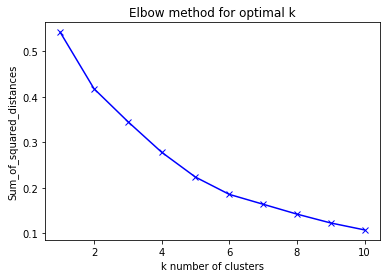

In [29]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()

According to the figure above, the correct value for k could be 4 or 5. Here, we choose cluster the data points using k=5.

In [30]:
# Cluster the venues of Paris into 5 clusters

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 3, 0, 3, 2, 3, 3, 3], dtype=int32)

In [31]:
paris_merged = paris_data
 
# add clustering labels
paris_merged["Cluster Labels"] = kmeans.labels_
paris_merged = pd.merge(paris_merged, paris_neighborhoods_venues_sorted,  how = "left", left_on = ["Arrondissement","Neighborhood"], right_on = ["Arrondissement","Neighborhood"])

paris_merged

,Arrondissement,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Louvre,48.862563,2.336443,0,Hotel,French Restaurant,Japanese Restaurant,Plaza,Café,Historic Site,Exhibit,Cosmetics Shop,Udon Restaurant,Art Museum
1,2,Bourse,48.868279,2.342803,3,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Hotel,Bistro,Boutique,Plaza,Pedestrian Plaza,Pastry Shop
2,3,Temple,48.862872,2.360001,3,French Restaurant,Bistro,Coffee Shop,Cocktail Bar,Italian Restaurant,Café,Sandwich Place,Chinese Restaurant,Bakery,Moroccan Restaurant
3,4,Hôtel-de-Ville,48.854341,2.357630,3,French Restaurant,Ice Cream Shop,Plaza,Tapas Restaurant,Hotel,Bakery,Pastry Shop,Pub,Bookstore,Coffee Shop
4,5,Panthéon,48.844443,2.350715,0,French Restaurant,Bar,Bakery,Wine Bar,Museum,Café,Italian Restaurant,Pub,Plaza,Hotel
5,6,Luxembourg,48.849130,2.332898,3,Hotel,French Restaurant,Italian Restaurant,Ice Cream Shop,Wine Bar,Bistro,Tea Room,Bakery,Pastry Shop,Chocolate Shop
6,7,Palais-Bourbon,48.856174,2.312188,2,French Restaurant,Hotel,Plaza,Italian Restaurant,Café,Historic Site,History Museum,Cocktail Bar,Coffee Shop,Garden
7,8,Elysée,48.872721,2.312554,3,Hotel,French Restaurant,Italian Restaurant,Art Gallery,Bakery,Clothing Store,Japanese Restaurant,Spa,Garden,Salad Place
8,9,Opéra,48.877164,2.337458,3,French Restaurant,Hotel,Cocktail Bar,Bakery,Italian Restaurant,Bistro,Japanese Restaurant,Wine Bar,Lounge,Pastry Shop
9,10,Entrepôt,48.876130,2.360728,3,French Restaurant,Coffee Shop,Bistro,Pizza Place,Italian Restaurant,Cocktail Bar,Bakery,Asian Restaurant,Breakfast Spot,Seafood Restaurant


In [32]:
# create map
map_clusters = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged["Latitude"], paris_merged["Longitude"], paris_merged["Neighborhood"], paris_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

**Note:** If the leaflet map above is not displayed when viewing from within the Github environment, please feel free to use this workaround Jupyter Notebook viewer http://nbviewer.jupyter.org. 

##### Cluster Manhattan venues

###### Choosing the correct k number of clusters - Elbow Method

In order to identify the correct choice of k, we use one technique, which consists in running the clustering across different values of k and looking at a metric of accuracy for clustering. This metric can be the sum of squared distances between data points and their cluster centroid.

Increasing the number of clusters obviously reduces the distance of data points to centroids. We plot the value of the metric as a function of k and identify the elbow point where the rate of decrease shifts. It is the correct k for clustering. 

In [33]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood"]
manhattan_grouped_clustering = manhattan_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(manhattan_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

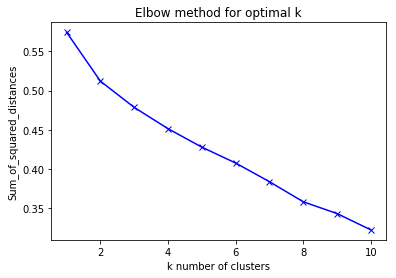

In [34]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()

According to the figure above, the correct value for k could be 7 or 8. Here, we choose cluster the data points using k=8.

In [35]:
# Cluster the venues of Paris into 5 clusters

# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 2, 7, 2, 2, 6, 7, 3], dtype=int32)

In [36]:
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged["Cluster Labels"] = kmeans.labels_

# merge manhattan_grouped with manhattann_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_venues_sorted.set_index("Neighborhood"), on="Neighborhood")

manhattan_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Pharmacy,Donut Shop,Pizza Place,Spanish Restaurant,Supermarket,Bank,Mexican Restaurant,Bus Station,Shoe Store,Athletics & Sports
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Dumpling Restaurant,Ice Cream Shop,Coffee Shop,Noodle House,Sandwich Place,Spa
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Pizza Place,Latin American Restaurant,Café,Bakery,Mexican Restaurant,Mobile Phone Shop,Tapas Restaurant,Park,Deli / Bodega,Grocery Store
3,Manhattan,Inwood,40.867684,-73.921210,2,Pizza Place,Latin American Restaurant,Mexican Restaurant,Deli / Bodega,Bakery,Spanish Restaurant,Café,Wine Bar,Restaurant,Lounge
4,Manhattan,Hamilton Heights,40.823604,-73.949688,7,Coffee Shop,Deli / Bodega,Mexican Restaurant,Café,Pizza Place,Bar,Yoga Studio,Park,Chinese Restaurant,Sandwich Place
5,Manhattan,Manhattanville,40.816934,-73.957385,2,Deli / Bodega,Mexican Restaurant,Park,Italian Restaurant,Coffee Shop,Supermarket,History Museum,Indian Restaurant,Liquor Store,Chinese Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,2,Coffee Shop,Juice Bar,African Restaurant,Gym,Fried Chicken Joint,Southern / Soul Food Restaurant,Tapas Restaurant,Theater,Caribbean Restaurant,Bar
7,Manhattan,East Harlem,40.792249,-73.944182,6,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Café,Restaurant,Chinese Restaurant,Plaza
8,Manhattan,Upper East Side,40.775639,-73.960508,7,Exhibit,Italian Restaurant,Art Gallery,Bakery,Hotel,Coffee Shop,Gym / Fitness Center,Yoga Studio,Pizza Place,Spa
9,Manhattan,Yorkville,40.775930,-73.947118,3,Italian Restaurant,Gym,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Japanese Restaurant,Deli / Bodega,Bagel Shop,Ice Cream Shop


In [37]:
# create map
map_clusters = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged["Latitude"], manhattan_merged["Longitude"], manhattan_merged["Neighborhood"], manhattan_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

**Note:** If the leaflet map above is not displayed when viewing from within the Github environment, please feel free to use this workaround Jupyter Notebook viewer http://nbviewer.jupyter.org. 

## 4. Results

From the clustering outcomes, we examine the contents of each cluster within a city.

### 4.1 Paris

![alt text](paris_clusters.png "Paris clusters")

#### Cluster 1: Red cluster

In [38]:
# Cluster 1

paris_merged.loc[paris_merged["Cluster Labels"] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,Hotel,French Restaurant,Japanese Restaurant,Plaza,Café,Historic Site,Exhibit,Cosmetics Shop,Udon Restaurant,Art Museum
4,Panthéon,French Restaurant,Bar,Bakery,Wine Bar,Museum,Café,Italian Restaurant,Pub,Plaza,Hotel
11,Reuilly,Lake,Exhibit,French Restaurant,Bus Stop,Monument / Landmark,Diner,Japanese Restaurant,Zoo,Falafel Restaurant,Farmers Market
12,Gobelins,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Hotel,Japanese Restaurant,Bakery,Supermarket,Cambodian Restaurant
13,Observatoire,French Restaurant,Hotel,Italian Restaurant,Bakery,Bar,Plaza,Pizza Place,Sushi Restaurant,Bistro,Restaurant
19,Ménilmontant,French Restaurant,Bar,Bistro,Plaza,Bakery,Japanese Restaurant,Café,Fast Food Restaurant,Supermarket,Italian Restaurant


#### Cluster 2: Purple cluster

In [39]:
# Cluster 2

paris_merged.loc[paris_merged["Cluster Labels"] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Buttes-Montmartre,French Restaurant,Bar,Pizza Place,Bistro,Italian Restaurant,Café,Bakery,Japanese Restaurant,Gastropub,Middle Eastern Restaurant


#### Cluster 3: Blue cluster

In [40]:
# Cluster 3

paris_merged.loc[paris_merged["Cluster Labels"] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,French Restaurant,Hotel,Plaza,Italian Restaurant,Café,Historic Site,History Museum,Cocktail Bar,Coffee Shop,Garden


#### Cluster 4: Green cluster

In [41]:
# Cluster 4

paris_merged.loc[paris_merged["Cluster Labels"] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bourse,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Hotel,Bistro,Boutique,Plaza,Pedestrian Plaza,Pastry Shop
2,Temple,French Restaurant,Bistro,Coffee Shop,Cocktail Bar,Italian Restaurant,Café,Sandwich Place,Chinese Restaurant,Bakery,Moroccan Restaurant
3,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Plaza,Tapas Restaurant,Hotel,Bakery,Pastry Shop,Pub,Bookstore,Coffee Shop
5,Luxembourg,Hotel,French Restaurant,Italian Restaurant,Ice Cream Shop,Wine Bar,Bistro,Tea Room,Bakery,Pastry Shop,Chocolate Shop
7,Elysée,Hotel,French Restaurant,Italian Restaurant,Art Gallery,Bakery,Clothing Store,Japanese Restaurant,Spa,Garden,Salad Place
8,Opéra,French Restaurant,Hotel,Cocktail Bar,Bakery,Italian Restaurant,Bistro,Japanese Restaurant,Wine Bar,Lounge,Pastry Shop
9,Entrepôt,French Restaurant,Coffee Shop,Bistro,Pizza Place,Italian Restaurant,Cocktail Bar,Bakery,Asian Restaurant,Breakfast Spot,Seafood Restaurant
10,Popincourt,Bar,French Restaurant,Cocktail Bar,Restaurant,Bistro,Pizza Place,Italian Restaurant,Beer Bar,Vegetarian / Vegan Restaurant,Wine Bar
14,Vaugirard,French Restaurant,Hotel,Italian Restaurant,Bistro,Coffee Shop,Lebanese Restaurant,Park,Restaurant,Bakery,Japanese Restaurant
16,Batignolles-Monceau,Hotel,French Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Restaurant,Bistro,Plaza,Bar,Café


#### Cluster 5: Orange cluster (west of Paris)

In [42]:
# Cluster 5

paris_merged.loc[paris_merged["Cluster Labels"] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Passy,Plaza,Pool,Lake,French Restaurant,Garden,Basketball Court,Coffee Shop,Circus,Castle,Diner


### 4. 2 Manhattan 

![alt text](manhattan_clusters.png "Manhattan clusters")

#### Cluster 1: Red cluster

In [43]:
# Cluster 1

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Dumpling Restaurant,Ice Cream Shop,Coffee Shop,Noodle House,Sandwich Place,Spa
2,Washington Heights,Pizza Place,Latin American Restaurant,Café,Bakery,Mexican Restaurant,Mobile Phone Shop,Tapas Restaurant,Park,Deli / Bodega,Grocery Store
13,Lincoln Square,Italian Restaurant,French Restaurant,Theater,Gym / Fitness Center,Café,Concert Hall,Gym,Hotel,Indie Movie Theater,Opera House
20,Lower East Side,Italian Restaurant,Japanese Restaurant,Coffee Shop,Café,Cocktail Bar,Pizza Place,Speakeasy,Mexican Restaurant,Latin American Restaurant,Ice Cream Shop
21,Tribeca,American Restaurant,Italian Restaurant,Spa,Coffee Shop,Hotel,French Restaurant,Cocktail Bar,Wine Bar,Greek Restaurant,Park
25,Manhattan Valley,Coffee Shop,Pizza Place,Park,Spa,Bar,Café,Chinese Restaurant,Mexican Restaurant,Indian Restaurant,Yoga Studio
39,Hudson Yards,Theater,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Hotel,Art Gallery,Lounge,American Restaurant,Gym,Park


#### Cluster 2: Purple cluster

In [44]:
# Cluster 2

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Upper West Side,Italian Restaurant,Bakery,Ice Cream Shop,Coffee Shop,Burger Joint,Bar,Indian Restaurant,American Restaurant,Wine Bar,Pub
18,Greenwich Village,Italian Restaurant,Clothing Store,Café,Coffee Shop,Gym,Sushi Restaurant,American Restaurant,Ice Cream Shop,Pizza Place,Seafood Restaurant
27,Gramercy,Indian Restaurant,Italian Restaurant,American Restaurant,Restaurant,Pizza Place,Mediterranean Restaurant,Cocktail Bar,Gym,Food Truck,Playground
29,Financial District,Coffee Shop,Hotel,Park,Gym,Steakhouse,Italian Restaurant,Sandwich Place,Wine Shop,Pizza Place,Food Truck
35,Turtle Bay,Sushi Restaurant,Italian Restaurant,French Restaurant,Park,Coffee Shop,Wine Bar,Greek Restaurant,Steakhouse,Indian Restaurant,Seafood Restaurant
38,Flatiron,Italian Restaurant,Gym / Fitness Center,New American Restaurant,Gym,American Restaurant,Bakery,Cosmetics Shop,Cycle Studio,Wine Shop,Japanese Restaurant


#### Cluster 3: Blue cluster

In [45]:
# Cluster 3

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Pizza Place,Latin American Restaurant,Mexican Restaurant,Deli / Bodega,Bakery,Spanish Restaurant,Café,Wine Bar,Restaurant,Lounge
5,Manhattanville,Deli / Bodega,Mexican Restaurant,Park,Italian Restaurant,Coffee Shop,Supermarket,History Museum,Indian Restaurant,Liquor Store,Chinese Restaurant
6,Central Harlem,Coffee Shop,Juice Bar,African Restaurant,Gym,Fried Chicken Joint,Southern / Soul Food Restaurant,Tapas Restaurant,Theater,Caribbean Restaurant,Bar
14,Clinton,Theater,Italian Restaurant,American Restaurant,Wine Shop,Gym / Fitness Center,Coffee Shop,Hotel,Bakery,Gym,Spa
17,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,American Restaurant,Bakery,Art Gallery,Nightclub,Hotel,Seafood Restaurant,Asian Restaurant
24,West Village,Italian Restaurant,Jazz Club,American Restaurant,Pizza Place,Bakery,New American Restaurant,Cosmetics Shop,Wine Bar,Park,Tea Room
32,Civic Center,French Restaurant,Spa,Bakery,Cocktail Bar,Coffee Shop,Gym / Fitness Center,Hotel,Yoga Studio,Park,Playground


#### Cluster 4: Blue-Green cluster

In [46]:
# Cluster 4

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Pharmacy,Donut Shop,Pizza Place,Spanish Restaurant,Supermarket,Bank,Mexican Restaurant,Bus Station,Shoe Store,Athletics & Sports
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Japanese Restaurant,Deli / Bodega,Bagel Shop,Ice Cream Shop
11,Roosevelt Island,Park,Sushi Restaurant,Greek Restaurant,Baseball Field,Dog Run,Gym,Bus Line,Pizza Place,Bus Station,Playground
23,Soho,Clothing Store,Boutique,Women's Store,Coffee Shop,Italian Restaurant,Art Gallery,Bakery,Café,Shoe Store,Men's Store
26,Morningside Heights,Coffee Shop,Sandwich Place,Mexican Restaurant,Deli / Bodega,Park,Playground,Chinese Restaurant,Bookstore,Italian Restaurant,American Restaurant
33,Midtown South,Korean Restaurant,Hotel,Coffee Shop,Japanese Restaurant,Hotel Bar,Gym / Fitness Center,Italian Restaurant,American Restaurant,Lounge,Lingerie Store
34,Sutton Place,Italian Restaurant,Indian Restaurant,Gym / Fitness Center,Furniture / Home Store,American Restaurant,Coffee Shop,Dessert Shop,Gym,Bakery,Juice Bar


#### Cluster 5: Light green cluster (far south-west of Manhattan)

In [47]:
# Cluster 5

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Battery Park City,Park,Coffee Shop,Hotel,Plaza,Gym,Italian Restaurant,Ice Cream Shop,Mexican Restaurant,Scenic Lookout,BBQ Joint


#### Cluster 6: Green cluster

In [48]:
# Cluster 6

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Lenox Hill,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Sushi Restaurant,Pizza Place,Sporting Goods Shop,Burger Joint,Gym,Bakery,Art Gallery
16,Murray Hill,Japanese Restaurant,Coffee Shop,Gym,Italian Restaurant,American Restaurant,Spa,Sandwich Place,Hotel,Gym / Fitness Center,Gourmet Shop
31,Noho,Italian Restaurant,Cocktail Bar,Coffee Shop,American Restaurant,Seafood Restaurant,Japanese Restaurant,Hotel,Southern / Soul Food Restaurant,Pizza Place,Sushi Restaurant
36,Tudor City,Coffee Shop,Grocery Store,Seafood Restaurant,Burger Joint,Japanese Restaurant,Pizza Place,Hotel,Restaurant,Pub,Gym


#### Cluster 7: Light orange cluster 

In [49]:
# Cluster 7

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 6, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Café,Restaurant,Chinese Restaurant,Plaza
15,Midtown,Coffee Shop,Theater,Hotel,Japanese Restaurant,Sandwich Place,Women's Store,Steakhouse,Cuban Restaurant,Plaza,Park
22,Little Italy,Italian Restaurant,Boutique,Café,Ice Cream Shop,Seafood Restaurant,Cocktail Bar,Hotel,Women's Store,Pizza Place,Sandwich Place
37,Stuyvesant Town,Bar,Cocktail Bar,Wine Shop,Coffee Shop,Bagel Shop,Playground,Park,Mexican Restaurant,Italian Restaurant,Latin American Restaurant


#### Cluster 8: Orange cluster

In [50]:
# Cluster 8

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 7, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Coffee Shop,Deli / Bodega,Mexican Restaurant,Café,Pizza Place,Bar,Yoga Studio,Park,Chinese Restaurant,Sandwich Place
8,Upper East Side,Exhibit,Italian Restaurant,Art Gallery,Bakery,Hotel,Coffee Shop,Gym / Fitness Center,Yoga Studio,Pizza Place,Spa
19,East Village,Ice Cream Shop,Bar,Pizza Place,Coffee Shop,Cocktail Bar,Wine Bar,Juice Bar,Japanese Restaurant,Seafood Restaurant,Café
30,Carnegie Hill,Pizza Place,Café,Coffee Shop,Gym,Yoga Studio,Spa,Art Museum,Bakery,Bookstore,Cocktail Bar


## 5. Discussion

Now that we have the contents of our clusters within each city, we want to identify these clusters by discriminating the venues that distinguish each cluster.  

To do so, we can surely proceed with more code to perform **descriptive analytics** or use some other analytics tools such as **Excel** or BI applications, e.g. **Power BI** or **Tableau**.   

This work is not shown here in this report, however we use the results to discuss our observations in this section.

### 5.1 About Paris

![alt text](paris_clusters.png "Paris clusters")

We have five clusters in Paris with three of them, namely clusters 3, 4 and 5, containing only 1 neighborhood. 

Based on the image above, the colors code is as follows:

    cluster 1: red
    cluster 2: purple
    cluster 3: blue
    cluster 4: green
    cluster 5: orange (west of Paris)


1. City of culinary experience

    Restaurants and bistros, which are typical Parisian restaurants serving mostly daily French food, are the most recommended common venues **by Foursquare users**.

    We can find restaurants everywhere, in every cluster, accounting for about 40-45% of the top 10 recommended venues in the two main clusters, i.e. clusters 1 and 2. French cuisine is obviously predominant (note that every cluster has 10% of French restaurants) followed by Italian cuisine and Japanese cuisine. There is no surprise about French and Italian food, which could be considered as local taste, being popular but Japanese cuisine seems to be also trendy in Paris.

    
2. Paris, a cool place to drink too

    This city is famed for its dining but it's also a cool place to drink too.
    
    The bar scene is diverse with wine bars, beer bars, cocktail bars, pubs and so on, as recommended venues. Except in cluster 4 (only 1 neighborhood, which by the way is remote from downtown), we can also find bars in every cluster. The two main clusters have similar rate of recommendations for bars, at about 12%.
    
    
3. Café and baguette

    Paris has also a plethora of cafés/coffee shops and bakeries. These venues account for 14-17% of recommendations in clusters 1 and 2. Here also, except in cluster 4, we can find cafés and bakeries in every cluster.
    

4. Accommodation

    Clusters 1 and 2 cover 85% (17 arrondissements out of 20) of the Paris area, so not surprisingly cover almost all the hotels in our recommendations, amounting about 7-8% of the venues in each cluster. 
    
    
Discriminating clusters.


* Cluster 1 and cluster 4:

    These are the two main clusters with 6 neighborhoods for cluster 1 and 11 neighborhoods for cluster 4. We can observe that these clusters are alike with regard to the rate of restaurants, cafés and accommodation. So we can barely distinguish them. The main difference is that cluster 4 contains museums, historic landmarks, which are also famous features of Paris, while cluster 1 has none. 
   
    Cluster 1: Intellectual, lively and trendy travelers.
    
    Cluster 4: History, art and fashion lovers.
    

* Cluster 2: Buttes-Montmartre could be good for bohemian travelers because of the various styles of food venues.


* Cluster 3: Only 1 neighborhood, Palais-Bourbon in the 7th arrondissement. A cluster with history and culture.
    
    
* Cluster 5: Passy neighborhood at the west side of Paris, quite remote, with a few venues for sport enthusiasts. 


    

### 5.2 About Manhattan

![alt text](manhattan_clusters.png "Manhattan clusters")

We have eight clusters in Manhattan. Based on the image above, the colors code is as follows:

    cluster 1: red
    cluster 2: purple
    cluster 3: blue
    cluster 4: blue-green 
    cluster 5: light green
    cluster 6: green
    cluster 7: light orange
    cluster 8: orange


1. Not surprisingly, restaurants and food places are largely rated among clusters:

        Cluster 1: 36%        
        Cluster 2: 51%        
        Cluster 3: 38%
        Cluster 4: 37%
        Cluster 5: 20%
        Cluster 6: 50%
        Cluster 7: 40%
        Cluster 8: 30%    
    
    We may note that a part (24% in cluster 4) of the food venues are pizza, sandwich and burger places, which also tells about the Manhattan style of eateries.
    

2. Bars are also in every cluster, except in cluster 5, which has only 1 neighborhood. The average of bars then is about 7% of the recommendations, reaching 12.5% in cluster 8.


3. Cafés/coffee shops, bakeries and alike shops cover between 10 and 20% of the venues. 


4. Accommodation recommendations are a bit lower compared to Paris. Intuitively, we may think that Paris is more rated by travelers. 


5. Gym / Fitness centers are largely more rated than in Paris. This confirms that rating in Manhattan is more from locals.

Discriminating clusters.

   * Cluster 1: A large part of recommendations for cultural and entertainment venues, at about 9%.
   
   
   * Cluster 2: More than 50% of the recommendations are about eateries with 43% of restaurants, mainly Italian cuisine. 
    
    
   * Cluster 3: A mix of everything with a wide variety of restaurants. 
   
   
   * Cluster 4: Lots of stores in this cluster.
   
   
   * Cluster 5: Only 1 neighborhood, Battery Park City at the far south-west of Manhattan. 
   
   
   * Cluster 6: Similar to Cluster 2, with about 50% of eateries. With 3/4 neighborhoods on the shores, seafood and sushi restaurants are popular. 
   
   
   * Cluster 7: Similar to cluster 6 but with less restaurants (30% here vs 40% in cluster 6)
   
   
   * Cluster 8: It could be a more residential cluster with the highest rate of gym venues amounting 12.5% of the cluster.



## 6. Conclusion

In this report, we looked at the problem of matching neighborhoods across Paris and Manhattan using Foursquare venues recommendations data. We just used simple metrics such as rates of venues listed in neighborhoods for comparison. When evaluating against ground truth data, we found that there are no clear similarities between clusters found in Paris and those found in Manhattan.

There would be a few reasons for these limitations.

* Featuring.

    Our Foursquare dataset include only the venues categories as one feature for clustering. We could use more features such as checkins and possibly user profiles. 
    
    We could also add more datasets including for example demographics, transportation, and real estate.
    
    
* Better use of geographical data. 

    For example, the Paris dataset is based on segmentation by arrondissement, which is not the best approach as actual neighborhoods with regard to venues could be located on more than one (overlapping) arrondissement. Also the administrative center of the arrondissement may not be the actual center of the neighborhood. 
    
    So, we should provide a better match for the selected neighborhoods with the ground truth neighborhoods. 
    
    
* Choosing better clustering algorithm.

    In this report, we used k-Means model but we could also try other models such as DBSCAN and hierarchical clustering. A few other approaches could be used too but they are beyond the level of this report.
    
    Note that with the k-Means model, we can empirically adjust the radius of the neighborhood but the results won't be significantly improved.
    
    
Having this said, the approach shown here in this report would be better used for comparing neighborhoods within a city but not comparing across cities.
    

## Thank you for reading this report! 